In [ ]:
#Author: Leigh Grover
#Student ID 009689385
#Class Computer Science Capstone - C964 
# Primary resources used for coding were documented on the written portion of this project.
# Other notable resources include:
# https://ashejim.github.io/C964/task2_c/example_sup_class/sup_class_ex-ui.html
# https://pytutorial.com/python-seaborn-histplot-tutorial-visualize-distributions/
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# https://www.geeksforgeeks.org/python-seaborn-regplot-method/
# https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder

In [2]:
matches = pd.read_csv("dataNWSL20232024.csv", index_col=0)

In [ ]:
# matches.describe()


In [ ]:
# matches.shape

In [5]:
# # Check for missing data in the dataset
# missing_data = matches.isnull().sum()
# missing_data = missing_data[missing_data > 0]

# print(missing_data)


In [ ]:
# from scipy.stats import pearsonr

# # Calculate the Pearson correlation coefficient
# correlation, p_value = pearsonr(matches['A'], matches['KP'])

# print(f"Pearson Correlation Coefficient: {correlation:.2f}")

In [6]:
#Create categorical variables for position played
matches["Pos"] = matches["P"].astype("category").cat.codes

In [8]:
#Create categorical variables for team names
matches["Teams"] = matches["Team"].astype("category").cat.codes

In [9]:
#Create weighted aggragate goal contribution score for the dependent variable
matches['GCS'] = (((matches['G']*2) + matches['A'])).astype(int)

In [11]:
#Utilize interquartile range method to identify outliers in the dependent variable and create variable

Q1 = matches['GCS'].quantile(0.25)
Q3 = matches['GCS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = matches['GCS'][(matches['GCS'] < lower_bound) | (matches['GCS'] > upper_bound)]

In [14]:
#clean dataset of outliers and remove all rows for player position of goalie
matches_cleaned = matches[~matches.index.isin(outliers.index) & (matches['P'] != 'G') & (matches['Pos'] != 2) ]

In [15]:
#create dataset for independent variables, dropping goals, assists, attacking assists and GCS
x = matches_cleaned.drop(columns=["G","A", "KP", "GCS"])

In [16]:
#create dataset for GCS
y = matches_cleaned["GCS"]

In [18]:
#create training and test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, test_size=0.2)

In [21]:
#identify predictor variables
predictors = ["S", "SOT", "Tackles", "FC", "FS", "GP"]

In [19]:
#create random forest model
rf=RandomForestClassifier(
    n_estimators=150,         
    min_samples_split=6,     
    bootstrap=True,           
    oob_score=True,           
    random_state=1            
)

In [22]:
#fit the training data to the model
rf.fit(x_train[predictors].values, y_train);

In [23]:
#test the model with predictions using the test data of independent variables
preds = rf.predict(x_test[predictors].values)

In [28]:
# rsq = r2_score(y_test, preds)
# rsq

In [29]:
# # Get the OOB score
# oob_score = rf.oob_score_

# # Calculate the OOB error score
# oob_error = 1 - oob_score

# print(f'OOB Score: {oob_score}')
# print(f'OOB Error Score: {oob_error}')

In [30]:
# mse = mean_squared_error(y_test, preds)
# mse

In [32]:
text = "Predicting NWSL Player Goal Contribution Scores with Machine Learning"


html_code = f"""
<div style="text-align: center; font-size: 28px; font-weight: bold;">
    {text}
</div>
"""
display(HTML(html_code))

In [65]:
print("This application is a predictive tool designed for evaluating and predicting a player's Goal Contribution Score (GCS)" 
" in the National Women’s Soccer League (NWSL). The GCS measures a player’s overall impact based on goals and assists. " 
"By entering key player statistics such as shots taken, tackles, and fouls, users can gain insights into a player’s "
"projected performance within the league. Below, users can explore visualizations about the data used for developing "
"this model and then use an interactive tool. This tool is perfect for NWSL fans, coaches and analysts.")

This application is a predictive tool designed for evaluating and predicting a player's Goal Contribution Score (GCS) in the National Women’s Soccer League (NWSL). The GCS measures a player’s overall impact based on goals and assists. By entering key player statistics such as shots taken, tackles, and fouls, users can gain insights into a player’s projected performance within the league. Below, users can explore visualizations about the data used for developing this model and then use an interactive tool. This tool is perfect for NWSL fans, coaches and analysts.


1. A histogram showing the distribution of the GCS in the data. 


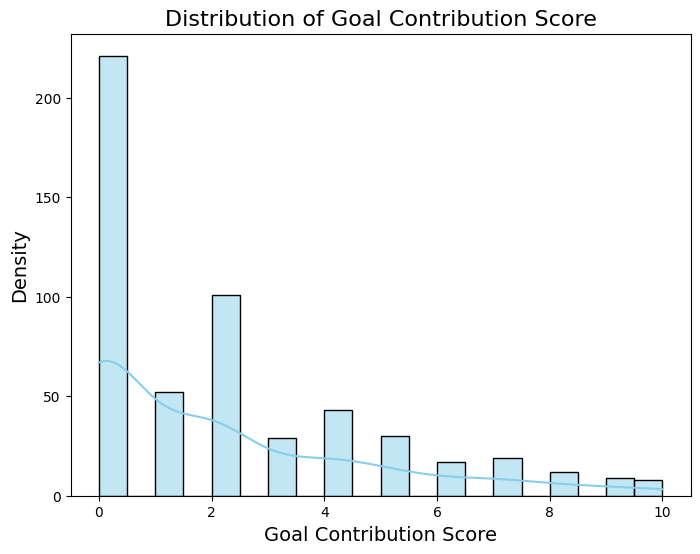

In [35]:
# Kernel Density Estimate Plot
plt.figure(figsize=(8, 6))
sns.histplot(matches_cleaned['GCS'], kde=True, bins=20, color='skyblue')

# Add titles and labels
plt.title('Distribution of Goal Contribution Score', fontsize=16)
plt.xlabel('Goal Contribution Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
print("1. A histogram showing the distribution of the GCS in the data. ")
# Show the plot
plt.show()

2. A pie chart illustrating the feature importance percentages in the model


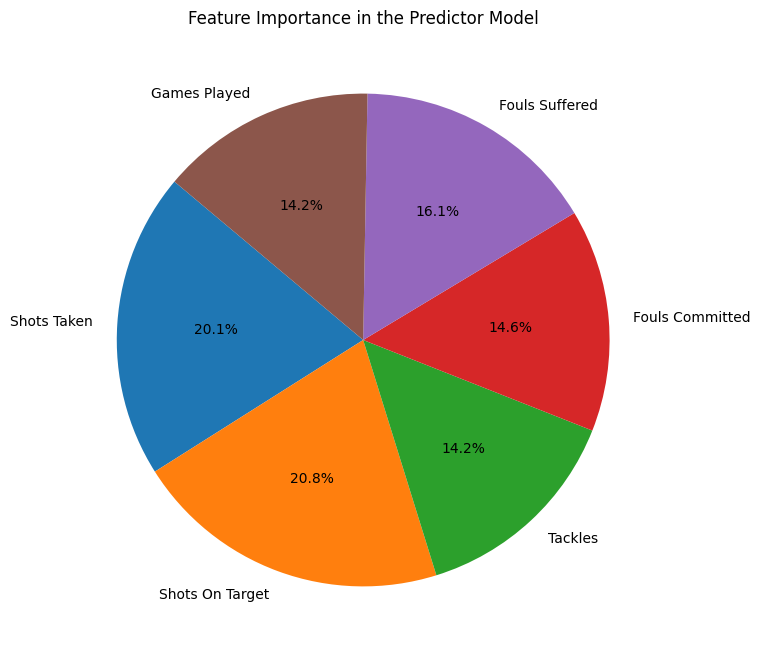

In [36]:
# Feature names corresponding to your predictors

feature_names = [
    'Shots Taken', 
    'Shots On Target', 
    'Tackles', 
    'Fouls Committed', 
    'Fouls Suffered', 
    'Games Played' 
]


feature_importances = rf.feature_importances_

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(feature_importances, labels=feature_names, autopct='%1.1f%%', startangle=140)
print("2. A pie chart illustrating the feature importance percentages in the model") 
# Add a title
plt.title('Feature Importance in the Predictor Model')

# Show the pie chart
plt.show()

3. A scatter plot showing predicted and actual GCS values with the model regression line.


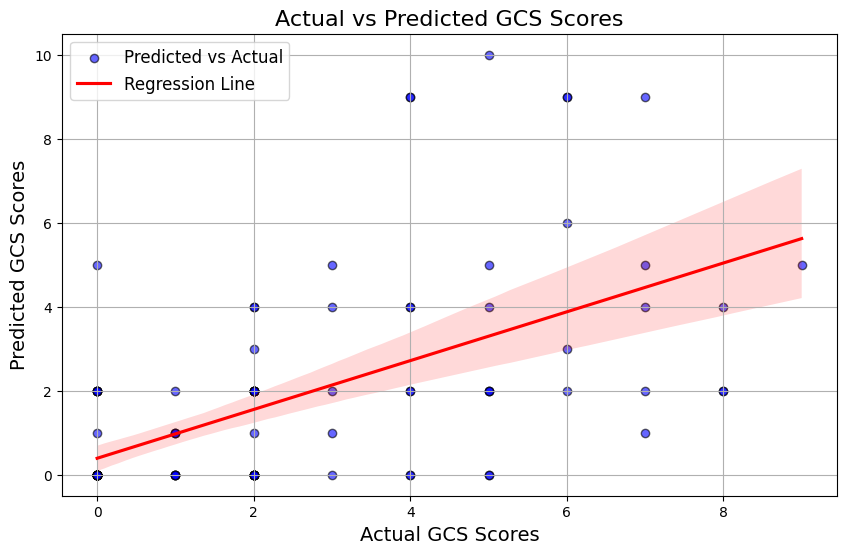

In [37]:
# Predict GCS scores
predicted_gcs = rf.predict(x_test[predictors].values)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, predicted_gcs, alpha=0.6, color='blue', edgecolor='k', label='Predicted vs Actual')

sns.regplot(x=y_test, y=predicted_gcs, scatter=False, color='red', label='Regression Line')


plt.title('Actual vs Predicted GCS Scores', fontsize=16)
plt.xlabel('Actual GCS Scores', fontsize=14)
plt.ylabel('Predicted GCS Scores', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

print("3. A scatter plot showing predicted and actual GCS values with the model regression line.")  

plt.show()

4. A scatter plot showing the proportion of shots on target over shots taken and GCS score. This was created as a visualization of interest because shots on target and shots taken have the highest percentage of feature predictability.  


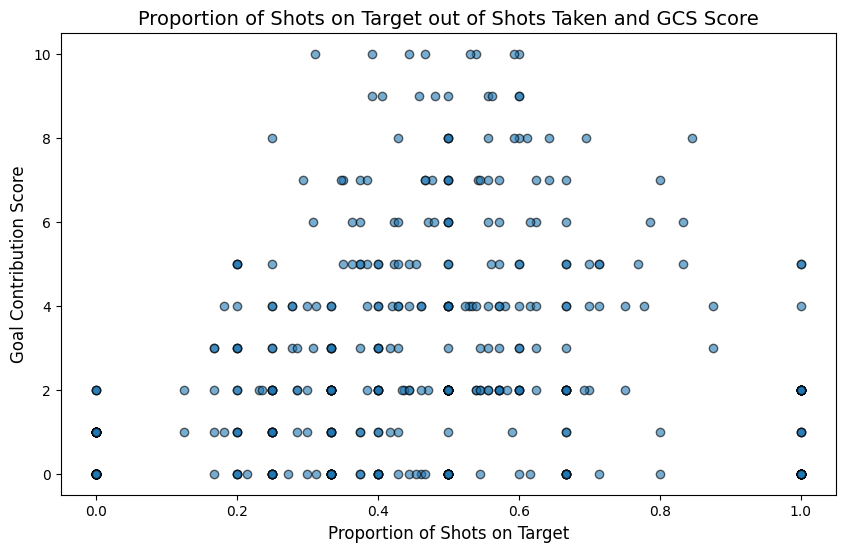

In [45]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

#copy made to avoid changing the cleaned datset
subset = matches_cleaned.copy()  
    
subset['On_Target_Proportion'] = subset['SOT'] / subset['S']
    
# Drop rows where scoring attempts ('S') are zero to avoid division by zero errors
subset = subset[subset['S'] > 0]

plt.scatter(
    subset['On_Target_Proportion'],
    subset['GCS'],
    alpha=0.6,
    edgecolors='k'
    )


plt.title('Proportion of Shots on Target out of Shots Taken and GCS Score', fontsize=14)
plt.xlabel('Proportion of Shots on Target', fontsize=12)
plt.ylabel('Goal Contribution Score', fontsize=12)


print("4. A scatter plot showing the proportion of shots on target over shots taken and GCS score. This was created as a visualization of interest because shots on target and shots taken have the highest percentage of feature predictability.  ")
plt.show()

In [46]:
# Integer widgets for numerical inputs
shots_taken = widgets.IntText(value=0, description='Shots Taken:')
shots_on_target = widgets.IntText(value=0, description='Shots On Target:')
tackles = widgets.IntText(value=0, description='Tackles:')
fouls_committed = widgets.IntText(value=0, description='Fouls Committed:')
fouls_suffered = widgets.IntText(value=0, description='Fouls Suffered:')
games_played = widgets.IntText(value=0, description='Games Played:')

In [47]:
output = widgets.Output()

In [64]:
# y.describe()

In [62]:
# Method for interpretation of 'GCS' text
mean = 2.13
std = 2.56
min_score = 0.00
q25 = 0.00
q50 = 1.00
q75 = 4.00
max_score = 10.00

# Create the interpretation blurb
def interpret_score(score):
    print(f"This player has a predicted goal contribution score of: {score}")
    interpretation = f"""
    \033[1mHow to Interpret the Score\033[0m
    
    The Goal Contribution Score (GCS) score reflects a player's contribution based on goals and assists.
    
    - The average score (mean) is {mean}, so if the score is close to this, the player's score is at an average level.
    - The standard deviation is {std}, which means that most players' scores fall within a range of about 2.56 points above or below the mean. A higher or lower score would indicate better or worse performance compared to the average.
    - The lowest possible score is {min_score}, which indicates no goals or assists.
    - The 25th percentile (Q1) is {q25}, meaning 25% of players have scores at the lowest value.
    - The median (50th percentile) score is {q50}, meaning 50% of players scored below this number and 50% scored above it.
    - The 75th percentile (Q3) is {q75}, meaning 75% of players have scores below this value, and 25% have higher scores.
    - The highest possible score was {max_score}.
    
    """
    
    return interpretation


In [51]:
# Function to handle submission
def on_submit(button):
    # Capture values from widgets
     with output:
        # Clear previous output
        output.clear_output()

        user_data = {
            'Shots Taken': shots_taken.value,
            'Shots On Target': shots_on_target.value,
            'Tackles': tackles.value,
            'Fouls Committed': fouls_committed.value,
            'Fouls Suffered': fouls_suffered.value,
            'Games Played': games_played.value,
            
        }

        predictors = [
            user_data['Shots Taken'],
            user_data['Shots On Target'],
            user_data['Tackles'],
            user_data['Fouls Committed'],
            user_data['Fouls Suffered'],
            user_data['Games Played']
            
        ]
        predictors_captured = [predictors]
        prediction = rf.predict(predictors_captured)

         
        # Format the prediction as a floating point with 2 decimals
        formatted_prediction = np.round(prediction, 2)
        
        blurb = interpret_score(prediction[0])
        print(blurb)
        

In [53]:
# Submit button
submit_button = widgets.Button(description="Submit")
submit_button.on_click(on_submit)

In [55]:
text = "Interactive Tool for Predicting a Player's Goal Contribution Score"


html_code = f"""
<div style="text-align: center; font-size: 24px; font-weight: bold;">
    {text}
</div>
"""
display(HTML(html_code))

In [57]:
print("Input data into the below boxes and press submit to find out the player score.")  
print("For inspiration, go to: https://www.nwslsoccer.com/stats/players. It is recommended to use completed NWSL seasons.")

Input data into the below boxes and press submit to find out the player score.
For inspiration, go to: https://www.nwslsoccer.com/stats/players. It is recommended to use completed NWSL seasons.


In [61]:
# Display all widgets
display(
    widgets.VBox([
        shots_taken,
        shots_on_target,
        tackles,
        fouls_committed,
        fouls_suffered,
        games_played,
        submit_button,
        output
    ])
)